In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [18]:
# 4E Example values
Q=0.45
theta=54.7*np.pi/180
phi=240*np.pi/180

In [30]:
# 4C1 Example values 
Q=0.556  #Angstroms
theta=5.2*np.pi/180
phi=183.7*np.pi/180

In [39]:
# z coordinate of each atom
js = np.arange(1,7)
z = np.zeros((6,2)) #atom number
for j in js:
    z[j-1,1] = 3**(-0.5) * Q*np.sin(theta) * np.cos(phi+2/3*np.pi*(j-1)) + Q/6*np.cos(theta)*(-1)**(j-1)
z[:,0]=js

In [38]:
js

array([1, 2, 3, 4, 5, 6])

In [40]:
z

array([[ 1.        ,  0.06325226],
       [ 2.        , -0.07614283],
       [ 3.        ,  0.10517585],
       [ 4.        , -0.12131832],
       [ 5.        ,  0.10842775],
       [ 6.        , -0.07939472]])

In [32]:
# Projection of bond length into reference plane
r = [1.532,1.532,1.532,1.532,1.532,1.532]
r_proj = np.zeros((6,2))
for j in range(1,6):
    r_proj[j-1,1]=(r[j-1]**2-(z[j-1,1]-z[j,1])**2)**0.5
r_proj[5,1]=(r[5]**2-(z[5,1]-z[0,1])**2)**0.5
r_proj[:,0]=js

In [34]:
r_proj

array([[1.        , 1.52564511],
       [2.        , 1.52123224],
       [3.        , 1.51516481],
       [4.        , 1.51467513],
       [5.        , 1.52044294],
       [6.        , 1.5253445 ]])

In [35]:
# Projection of angles into reference plane
beta = [111.5,111.5,111.5,111.5,111.5,111.5]
b_proj = np.zeros((6,2))
b_proj[0,1]=np.arccos(((z[1,1]-z[5,1])**2 - (z[0,1]-z[1,1])**2 - (z[1,1]-z[0,1])**2 + 2*r[5]*r[0]*np.cos(beta[0]))/(2*r_proj[5,1]*r_proj[0,1]))
for j in range(2,6):
    b_proj[j-1,1]=np.arccos(((z[j,1]-z[j-2,1])**2 - (z[j-1,1]-z[j-2,1])**2 - (z[j,1]-z[j-1,1])**2 + 2*r[j-2]*r[j-1]*np.cos(beta[j-1]))/(2*r_proj[j-2,1]*r_proj[j-1,1]))
b_proj[5,1]=np.arccos(((z[0,1]-z[4,1])**2 - (z[5,1]-z[4,1])**2 - (z[0,1]-z[5,1])**2 + 2*r[4]*r[5]*np.cos(beta[5]))/(2*r_proj[4,1]*r_proj[5,1]))

b_proj[:,0]=js



In [36]:
b_proj

array([[1.        , 1.60591391],
       [2.        , 1.60853084],
       [3.        , 1.61564961],
       [4.        , 1.62062865],
       [5.        , 1.61659321],
       [6.        , 1.60921263]])

### Values from Cremer-Pople paper, glucose from sucrose
### ~4C1
q2=0.050  
q3=0.554  
Q=0.556   
phi=183.7  
theta=5.2  

   |Cell coord                  |Cartesian coord|
   |---|---|
|0(5)  1  0.3772  0.3988  0.3686  |   0       1.3839  0.1976|  
|C(1)  2  0.2996  0.3579  0.4849  |   1.1997  0.7624 -0.2106|  
|C(2)  3  0.3125  0.4747  0.6360  |   1.2356 -0.7040  0.2393|  
|C(3)  4  0.2854  0.6367  0.5645  |   0.0110 -1.4564 -0.2550|  
|C(4)  5  0.3740  0.6709  0.4420  |  -1.2300 -0.7208  0.2420|  
|C(5)  6  0.3592  0.5511  0.2953  |  -1.2164  0.7350 -0.2133| 

In [42]:
x1 = [180,0,30,60,90,120,150,180,210,240,270,300,330,360,0,30,60,90,120,150,180,210,240,270,300,330,360,0,30,60,90,120,150,180,210,240,270,300,330,360,180]
y1 = [0,54.7,50.8,54.7,50.8,54.7,50.8,54.7,50.8,54.7,50.8,54.7,50.8,54.7,90,90,90,90,90,90,90,90,90,90,90,90,90,
      125.3,129.2,125.3,129.2,125.3,129.2,125.3,129.2,125.3,129.2,125.3,129.2,125.3,180]
z1 = [0.57,0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.76,0.62,0.76,0.62,0.76,0.62,0.76,0.62,0.76,0.62,0.76,0.62,0.76,
     0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.42,0.45,0.57]
data = np.array([x1,y1,z1])
data = np.transpose(data)

In [39]:
data[:,0]

array([180.,   0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270.,
       300., 330., 360.,   0.,  30.,  60.,  90., 120., 150., 180., 210.,
       240., 270., 300., 330., 360.,   0.,  30.,  60.,  90., 120., 150.,
       180., 210., 240., 270., 300., 330., 360., 180.])

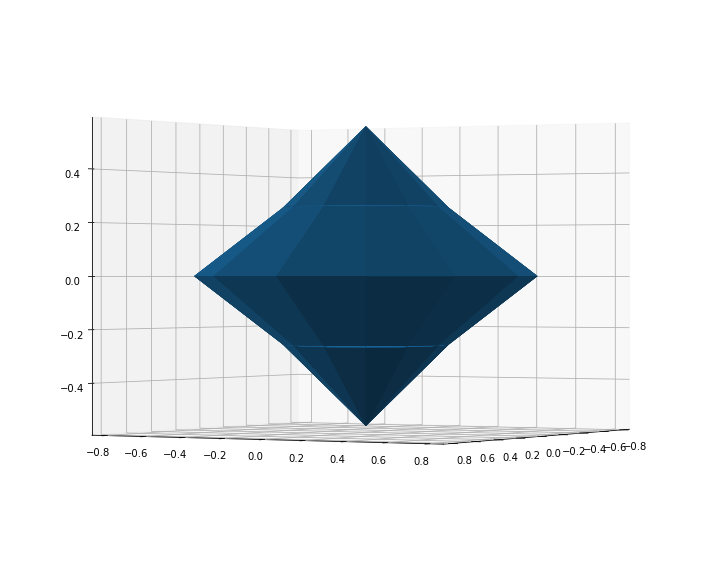

In [53]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')


u = data[:,0]/180*np.pi
v = data[:,1]/180*np.pi

x = data[:,2] * np.outer(np.cos(u), np.sin(v))
y = data[:,2] * np.outer(np.sin(u), np.sin(v))
z = data[:,2] * np.outer(np.ones(np.size(u)), np.cos(v))



ax.plot_surface(x, y, z)#, rstride=1, cstride=1, color='w', shade=0)
# surf = ax.plot_trisurf(x, y, z, cmap="viridis")


# surf.axis((0, 360, 0, 180, 0, 1))
# fig.colorbar(surf, shrink=0.7, aspect=5)
ax.view_init(0,30)


plt.tight_layout()
plt.show()